# Project : Mobile Price Prediction

**Import required libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
df=pd.read_csv('/content/train.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.shape

(2000, 21)

**Statistical measures of the dataset**

In [ ]:
df.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


**Checking missing values**

In [ ]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

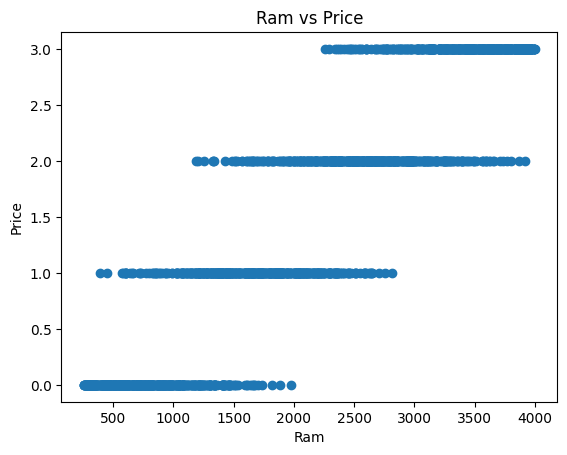

In [ ]:
plt.scatter(df['ram'],df['price_range'])
plt.xlabel('Ram')
plt.ylabel('Price')
plt.title('Ram vs Price')
plt.show()

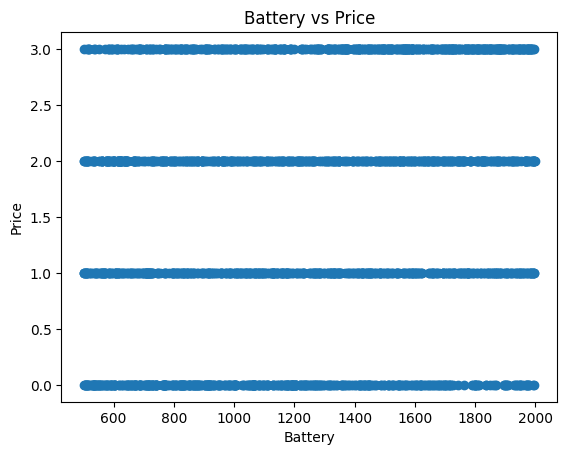

In [ ]:
plt.scatter(df['battery_power'],df['price_range'])
plt.xlabel('Battery')
plt.ylabel('Price')
plt.title('Battery vs Price')
plt.show()

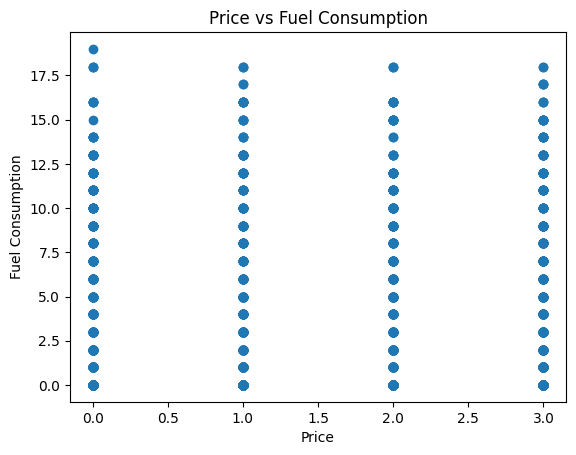

In [ ]:
plt.scatter(df['price_range'],df['fc'])
plt.xlabel('Price')
plt.ylabel('Fuel Consumption')
plt.title('Price vs Fuel Consumption')
plt.show()

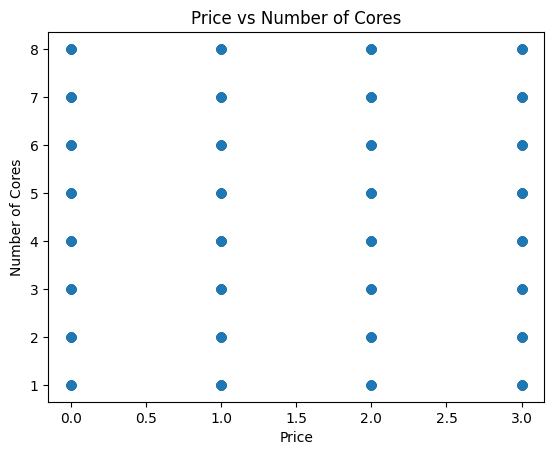

In [ ]:
plt.scatter(df['price_range'],df['n_cores'])
plt.xlabel('Price')
plt.ylabel('Number of Cores')
plt.title('Price vs Number of Cores')
plt.show()

**Correlation of the data**

In [ ]:
corr=df.corr()
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


**Display Correlation of the data**

<Axes: >

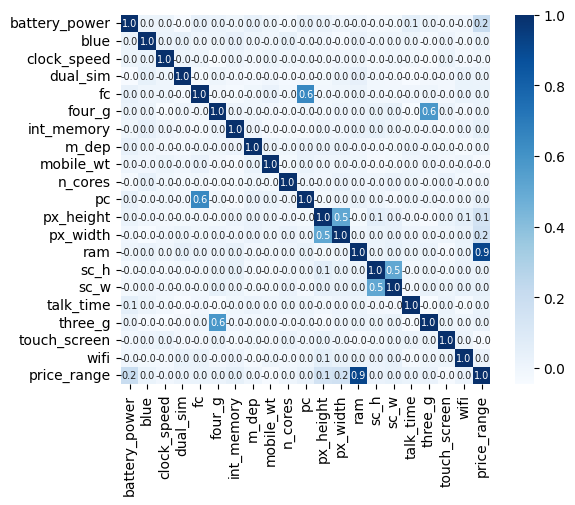

In [ ]:
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':7},cmap='Blues')

**Separating the Input features and target**

In [ ]:
x=df.drop('price_range',axis=1)
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [ ]:
y=df['price_range']
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

**Feature selection**

In [ ]:
corr_target=corr['price_range']
corr_target

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

In [ ]:
threshold=0.03
relevant_features=corr_target[abs(corr_target)>=threshold].index.tolist()
relevant_features

['battery_power',
 'int_memory',
 'mobile_wt',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_w',
 'touch_screen',
 'price_range']

In [ ]:
df.drop(df.columns.difference(relevant_features),axis=1,inplace=True)

In [ ]:
x1=df.drop(['price_range'],axis=1)
x1

,battery_power,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_w,touch_screen
0,842,7,188,2,20,756,2549,7,0
1,1021,53,136,6,905,1988,2631,3,1
2,563,41,145,6,1263,1716,2603,2,1
3,615,10,131,9,1216,1786,2769,8,0
4,1821,44,141,14,1208,1212,1411,2,1
...,...,...,...,...,...,...,...,...,...
1995,794,2,106,14,1222,1890,668,4,1
1996,1965,39,187,3,915,1965,2032,10,1
1997,1911,36,108,3,868,1632,3057,1,1
1998,1512,46,145,5,336,670,869,10,1


**Repeat steps in test data**

In [ ]:
fd=pd.read_csv('/content/test(2).csv')
fd

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [ ]:
fd.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [ ]:
fd.tail()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0
999,1000,1270,1,0.5,0,4,1,35,0.1,140,...,19,457,608,2828,9,2,3,1,0,1


In [ ]:
fd.shape

(1000, 21)

In [ ]:
fd.dtypes

id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

In [ ]:
fd.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [ ]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [ ]:
fd.describe(include='all')

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [ ]:
v_c=fd[['ram','battery_power','fc','n_cores']]
for i in v_c:
  print(fd[i].value_counts())
  print('*'*100)

1435    3
3816    3
1972    3
3386    3
2179    3
       ..
3238    1
1266    1
1634    1
3208    1
1223    1
Name: ram, Length: 872, dtype: int64
****************************************************************************************************
1074    5
1981    5
529     4
1745    4
1715    4
       ..
1248    1
1392    1
1706    1
1297    1
1185    1
Name: battery_power, Length: 721, dtype: int64
****************************************************************************************************
0     210
1     124
2      97
4      80
5      74
3      70
6      59
7      50
9      41
8      38
10     37
11     29
13     21
12     17
14     16
15     12
16     11
18     10
17      2
19      2
Name: fc, dtype: int64
****************************************************************************************************
4    142
1    138
2    134
5    130
3    127
8    121
7    107
6    101
Name: n_cores, dtype: int64
**********************************************************************

In [ ]:
corr=fd.corr()
corr

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
id,1.000000,-0.021511,0.000464,0.035917,-0.002721,0.016934,0.030921,-0.014023,-0.002794,-0.007541,...,0.001969,-0.025056,-0.012138,-0.043442,-0.011972,0.002918,0.030807,4.957099e-02,3.976791e-02,-0.036643
battery_power,-0.021511,1.000000,-0.046610,-0.039075,-0.061171,-0.007846,-0.042520,0.003751,-0.009065,-0.047065,...,0.012847,0.048647,0.053365,-0.032366,-0.055665,-0.023905,0.015546,3.151417e-02,-1.013784e-02,-0.000414
blue,0.000464,-0.046610,1.000000,0.034754,-0.011100,-0.056063,-0.001169,-0.012416,0.018319,0.023513,...,-0.025247,-0.058810,-0.032054,0.057570,0.012780,0.004223,-0.031995,1.352986e-02,-6.003074e-02,0.025568
clock_speed,0.035917,-0.039075,0.034754,1.000000,-0.012423,0.010127,-0.024665,-0.030487,0.016995,-0.014107,...,0.047469,0.017277,0.070585,-0.000650,-0.039503,-0.027138,-0.078797,-2.140644e-02,6.189276e-02,-0.048593
dual_sim,-0.002721,-0.061171,-0.011100,-0.012423,1.000000,0.057606,0.024907,-0.012158,0.021760,-0.001734,...,0.073936,0.006842,0.015610,0.048171,0.006295,-0.002064,0.004390,6.895838e-04,3.401967e-02,0.031545
fc,0.016934,-0.007846,-0.056063,0.010127,0.057606,1.000000,0.032832,-0.006565,0.020859,0.018353,...,0.659338,-0.017982,0.030550,-0.051997,0.045158,0.006115,-0.051458,-1.112104e-02,1.546706e-02,-0.060373
four_g,0.030921,-0.042520,-0.001169,-0.024665,0.024907,0.032832,1.000000,-0.037488,0.014806,-0.000509,...,0.037669,0.033655,0.036545,0.030821,-0.015087,-0.000893,0.013692,5.535283e-01,-1.000338e-02,-0.035652
int_memory,-0.014023,0.003751,-0.012416,-0.030487,-0.012158,-0.006565,-0.037488,1.000000,-0.004386,-0.010447,...,0.022682,-0.009564,-0.003877,-0.007107,-0.009249,0.024521,0.023759,-1.592239e-02,2.218589e-02,0.011860
m_dep,-0.002794,-0.009065,0.018319,0.016995,0.021760,0.020859,0.014806,-0.004386,1.000000,-0.041994,...,0.012663,0.062559,0.034861,0.018349,-0.026160,-0.023393,0.024124,-2.927827e-02,4.025363e-02,-0.039705
mobile_wt,-0.007541,-0.047065,0.023513,-0.014107,-0.001734,0.018353,-0.000509,-0.010447,-0.041994,1.000000,...,0.027343,0.011157,-0.014577,0.028786,-0.022053,0.022148,-0.021704,6.261881e-03,4.452531e-02,0.069762


<Axes: >

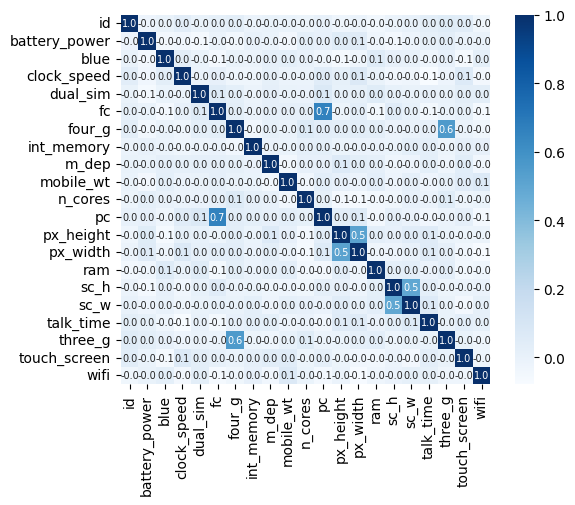

In [ ]:
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':7},cmap='Blues')

**Remove unwanted columns**

In [ ]:
fd.drop('id',axis=1,inplace=True)

In [ ]:
fd.drop(fd.columns.difference(relevant_features),axis=1,inplace=True)
fd

,battery_power,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_w,touch_screen
0,1043,5,193,16,226,1412,3476,7,1
1,841,61,191,12,746,857,3895,0,0
2,1807,27,186,4,1270,1366,2396,10,1
3,1546,25,96,20,295,1752,3893,0,1
4,1434,49,108,18,749,810,1773,8,0
...,...,...,...,...,...,...,...,...,...
995,1700,54,170,17,644,913,2121,8,1
996,609,13,186,2,1152,1632,1933,1,1
997,1185,8,80,12,477,825,1223,0,0
998,1533,50,171,12,38,832,2509,11,1


**Model Creation**
- DecisionTreeClassifier
- KNeighborsClassifier
- LogisticRegression

**DecisionTreeClassifier**

In [ ]:
model=DecisionTreeClassifier(criterion='entropy')
model.fit(x1,y)
y_pred=model.predict(fd)
y_pred

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 1, 2, 0, 3, 2, 0, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 0, 3, 3, 2, 0, 1, 1, 1,
       2, 2, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 1, 3, 3, 0, 3, 0, 3, 1,
       2, 0, 1, 2, 2, 0, 2, 1, 0, 2, 2, 3, 1, 0, 0, 3, 1, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 2, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 3, 3, 1, 0, 2,
       1, 1, 3, 0, 1, 0, 3, 2, 1, 3, 1, 3, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 2, 0, 0, 2,
       1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 1, 3, 3, 3, 1, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 1, 3, 0, 1, 0, 2, 2, 1, 3, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 2, 3, 2, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 0, 2, 2, 1, 2,
       3, 3, 3, 1, 1, 1, 2, 2, 2, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 2, 0, 2, 3, 1,

**KNeighborsClassifier**

In [ ]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x1,y)
y_pred=model.predict(fd)
y_pred

array([3, 3, 3, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 2, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       2, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 2, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 2, 2, 3, 2, 3, 0, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 1, 3, 1, 0, 2, 2,
       3, 3, 1, 1, 3, 2, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 1, 3, 0, 0, 2, 0, 0, 3, 3, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

**LogisticRegression**

In [ ]:
model=LogisticRegression(max_iter=1000)
model.fit(x1,y)
y_pred=model.predict(fd)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([2, 3, 2, 3, 1, 2, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 1, 1, 2, 1, 1, 3,
       1, 2, 3, 0, 3, 0, 3, 1, 2, 0, 3, 0, 0, 1, 3, 1, 3, 3, 0, 2, 0, 0,
       0, 1, 1, 3, 1, 2, 2, 0, 2, 0, 3, 0, 3, 1, 1, 3, 3, 3, 1, 2, 0, 2,
       1, 3, 1, 1, 1, 1, 2, 3, 2, 0, 3, 0, 2, 3, 0, 3, 3, 0, 2, 0, 3, 0,
       3, 1, 1, 1, 3, 0, 2, 3, 0, 2, 1, 3, 3, 0, 0, 3, 1, 1, 1, 1, 3, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 3, 0, 0, 3, 3, 1, 1, 0, 3, 3, 2, 1, 0, 3,
       1, 1, 3, 2, 1, 0, 3, 3, 1, 2, 1, 1, 3, 3, 3, 3, 1, 3, 2, 3, 1, 0,
       2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 1, 1, 1, 0, 2,
       1, 0, 2, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 0, 3, 1, 0, 2, 3,
       3, 3, 1, 3, 2, 3, 2, 1, 2, 0, 1, 1, 1, 2, 2, 2, 2, 3, 1, 3, 0, 3,
       2, 2, 2, 1, 0, 1, 0, 2, 0, 1, 0, 2, 1, 1, 3, 0, 3, 0, 3, 1, 1, 0,
       0, 3, 1, 3, 2, 3, 1, 1, 3, 0, 0, 2, 2, 3, 1, 3, 1, 1, 3, 3, 2, 3,
       3, 3, 3, 1, 0, 2, 2, 2, 2, 1, 2, 3, 0, 3, 0, 1, 1, 0, 0, 3, 2, 2,
       3, 1, 0, 3, 3, 2, 3, 2, 2, 1, 1, 1, 3, 3, 1,